# Matplotlibメモ
データを可視化するためのライブラリ

In [60]:
import numpy as np
import pandas as pd

# .pyplotモジュールをimportするのがほとんど
import matplotlib.pyplot as plt
# ↓jupyterでグラフを描画するためのコマンド
%matplotlib inline

## plt.plot

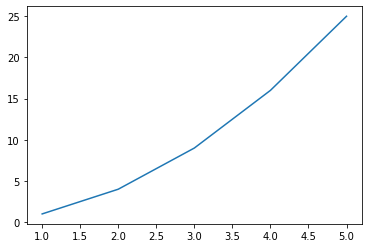

In [3]:
# グラフを描画する
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
plt.plot(x, y)

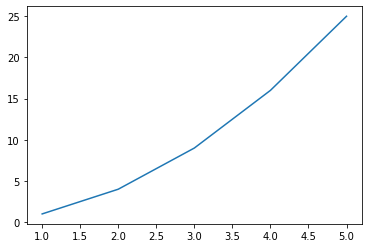

In [11]:
# yを数式で表現する。リストの各要素に対して演算するにはnumpy.arrayを使う
x = np.array([1, 2, 3, 4, 5])
y = x ** 2
plt.plot(x, y)

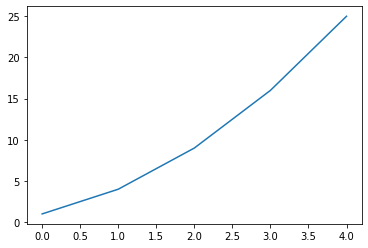

In [12]:
# xを入れないとyのインデックスが横軸になる
plt.plot(y)

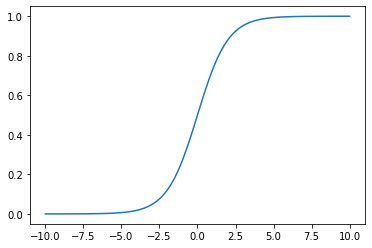

In [23]:
# 例）シグモイド関数を描画してみる
# 横軸はnp.linspaceを使うのが一般的。
# x = np.arange(-10.0,10.0,0.1)
x = np.linspace(-10, 10, 100)

#y = 1/(1 + np.e ** (-x))
# np.e（ネイピア数そのもの）よりもnp.exp()とした方が分かりやすい。また、シグモイド関数はzをよく使う
z = 1/(1 + np.exp(-x))
plt.plot(x, z)

In [98]:
# DataFrameを使ったプロット
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                   'b': [10, 15, 40, 100, 200, 400]})
df

,a,b
0,1,10
1,2,15
2,3,40
3,4,100
4,5,200
5,6,400


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  


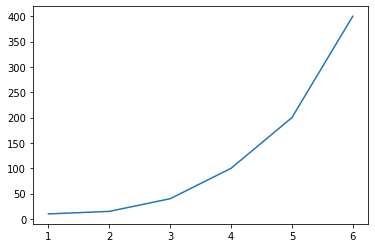

In [102]:
# plt.plot(df['a'], df['b'])でもOK
plt.plot('a','b', data=df)

# グラフのスタイル変更

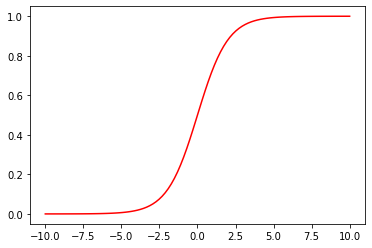

In [42]:
# 線の色を変える。
x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))

plt.plot(x, z, 'r')

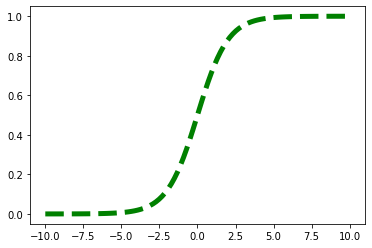

In [31]:
plt.plot(x, z, 'g--', linewidth=5)

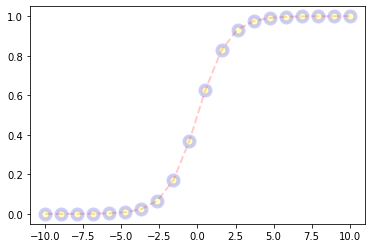

In [50]:
# lw=line width, ls= line style , alphaはプロットの透明度
x = np.linspace(-10, 10, 20)
z = 1/(1 + np.exp(-x))
plt.plot(x, z, 
         color='red', 
         lw=2, 
         ls='--', 
         marker='o',
         markersize=10,
         markerfacecolor='yellow',
         markeredgecolor='blue',
         markeredgewidth=4,
         alpha=0.2)

## タイトルや軸のラベル情報等の付属情報をつける

([<matplotlib.axis.YTick at 0x7f1872302690>,
 <a list of 3 Text yticklabel objects>)

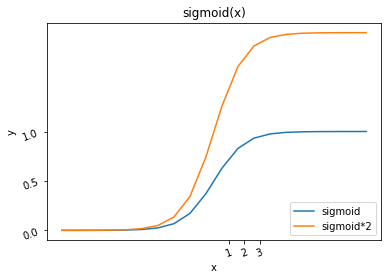

In [58]:
plt.plot(x, z, label='sigmoid')
# もう一つグラフを表示したいときは.plotをさらに書く
plt.plot(x, z*2, label='sigmoid*2')

# 軸ラベル、タイトルをつける
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid(x)')
　
# 凡例をつける。.plotでlabelを設定しておく必要あり.locは場所
plt.legend(loc=4)
# .xticksを指定すると、軸のその部分だけ目盛を表示する。rotationをつけると、目盛を回転して表示する
plt.xticks([1, 2, 3], rotation=20)
plt.yticks([0, 0.5, 1], rotation=20)



## Kaggleからダウンロードした映画レビューのデータセットを使った練習
    1. 映画数の年推移
    2. revenueの年推移（max, median, mean）　　
をplotしてみる。revenueはゼロを抜くこと。

In [209]:
df = pd.read_csv('../pandas/sample_data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### 1.　映画数の年推移

In [251]:
# release_dateを整形する

# nanがあると、下記ラムダ関数でfloatを入れるなと言われるので、先に落としておく。※ np.nanはfloat型扱い
df = df.dropna(subset=['release_date'])
#　release_dateの中身は文字列なので、このままだとグラフ化したときに目盛間隔がおかしくなる。よってintでキャストする
# こっちの書き方も可：df['year'] = df['release_date'].apply(lambda x: int(x[:4]))
df['year'] = df['release_date'].apply(lambda x: int(x.split('-')[0]))


# df.groupby('year').count()だけだと全カラムの要素数（nan除く)が出てしまうので、
# idなど抜けがないと予想されるカラムの行数でカウントする
# 参考：https://deepage.net/features/pandas-count.html
df.groupby('year').count()['id']


year
1916      1
1925      1
1927      1
1929      1
1930      1
       ... 
2012    150
2013    163
2014    143
2015    126
2016     73
Name: id, Length: 89, dtype: int64

Text(0, 0.5, 'count')

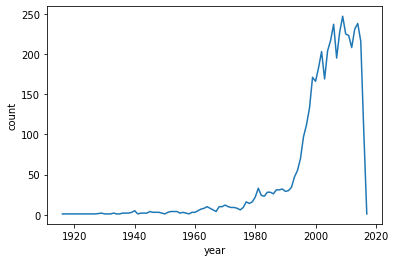

In [221]:
# Seriesなので、横軸には自動的にインデックスのyearが指定される
import matplotlib.dates as mdates

plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

# 

### 2.　revenueの年推移（中央値、平均、最大値）

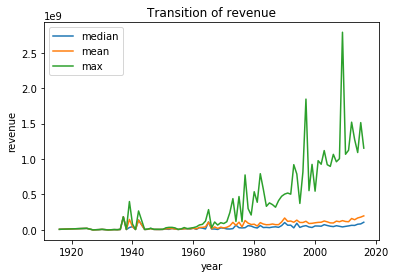

In [246]:
### 0を抜いた行でフィルタリング
df = df[df['revenue'] != 0]
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
# .maxの前にカラムを適用することに注意
plt.plot(df.groupby('year')['revenue'].max(),label='max')
plt.title('Transition of revenue')
plt.xlabel('year')
plt.ylabel('revenue')
plt.legend()



## 複数のグラフ(図)をプロットする

### plt.subplot()

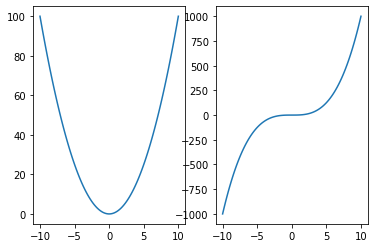

In [261]:
x = np.linspace(-10, 10, 100)
# .subplot(行数、列数、配置するインデックス（１から始まることに注意）)
plt.subplot(1, 2, 1)
plt.plot(x, x**2)

plt.subplot(1, 2, 2)
plt.plot(x, x**3)

### plt.figure()

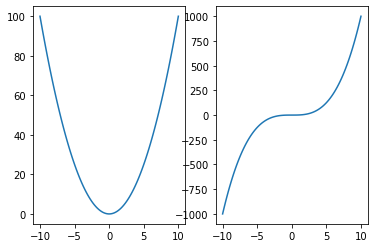

In [264]:
# figureクラスのfigインスタンスを作成する
# figはグラフ（図）というオブジェクトを定義するイメージ
fig = plt.figure()
# add_subplotメソッドを呼んで、ax1インスタンスを作成する
# axisは個々のグラフを描画するスペースを定義するイメージ
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, x**2)
ax2.plot(x, x**3)

### plt.subplots()


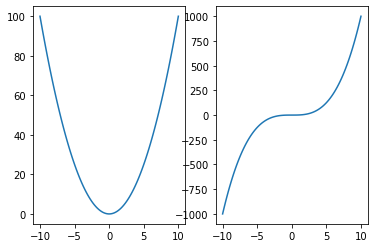

In [272]:
# fig,axisをまとめて定義する.axesはリストで返ってくる
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

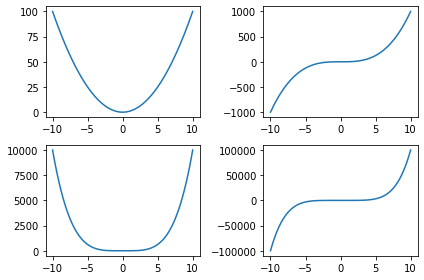

In [279]:
# 多次元の場合
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot(x, x**2)
axes[0,1].plot(x, x**3)
axes[1,0].plot(x, x**4)
axes[1,1].plot(x, x**5)

# グラフ全体のレイアウトをいい感じにする。（隣のグラフと軸などを被らせないようにする）
fig.tight_layout()


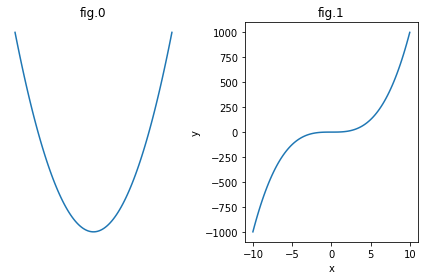

In [289]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

# まとめてスタイルを適用する
for i in range(0, 2):
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title('fig.{}'.format(str(i)))

# 軸を消す
axes[0].axis('off')
fig.tight_layout()

## 散布図： plt.scatter()

In [290]:
df = pd.read_csv('../pandas/sample_data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


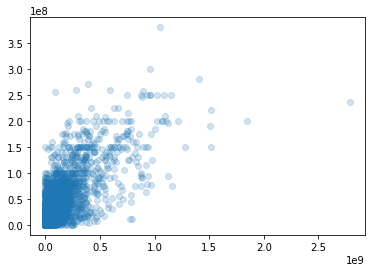

In [292]:
# 散布図を描く
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

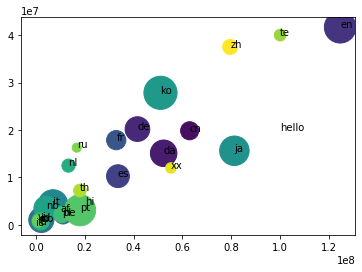

In [309]:
# groupごとのrevenue,budgetをプロットする。また、vote_countの平均値に応じてマークを大きくする
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]

# 複数カラムをとってくるときは[]にカラム名のリストを入れる
lang_grouped_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]

# scatterの場合のマーカーサイズはsで指定する
# グループごとの色はcで指定する。cにはDataFrameの要素数（グループの数）までの数列を指定すると、色を割り振ってくれる
c = np.arange(len(lang_grouped_df))
plt.scatter('revenue', 'budget', s='vote_count',c=c, data=lang_grouped_df)

# グラフ内にテキストを描く。↓座標をタプルで指定する。
plt.annotate('hello', (1.0e8, 2e7))
for idx, row in lang_grouped_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))

# ヒストグラム：　plt.hist()
連続値をある範囲ごとに区切って、その範囲に属するデータの数をプロットしたいときなどに使う  
横軸を階級（bin）、縦軸を度数（frequency）と呼んだりする。

(array([ 63.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   6.,
          4.,   0.,   6.,   5.,  17.,  20.,  12.,  23.,  12.,  38.,  49.,
         99., 107.,  63., 146., 198., 423., 340., 196., 417., 407., 615.,
        385., 160., 298., 244., 237.,  92.,  32.,  68.,   7.,   4.,   0.,
          0.,   0.,   1.,   1.,   0.,   4.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. ]),
 <a list of 50 Patch objects>)

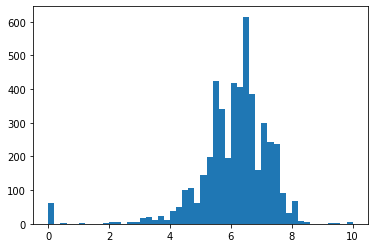

In [313]:
df = pd.read_csv('../pandas/sample_data/tmdb_5000_movies.csv')
# 基本敵にx軸の値だけ指定すればよい。binsで区切りの数を指定する
plt.hist(df['vote_average'], bins=50)

# histの戻り値でnumpy arrayが表示されてしまうので、邪魔な時は下記で描画する。
plt.show()

(array([2.000e+00, 2.600e+01, 6.120e+02, 1.358e+03, 4.850e+02, 2.680e+02,
        1.280e+02, 9.100e+01, 5.800e+01, 3.900e+01, 3.100e+01, 2.700e+01,
        2.000e+01, 1.600e+01, 1.400e+01, 9.000e+00, 9.000e+00, 1.200e+01,
        8.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1.65710090e+08, -1.11376586e+08, -5.70430829e+07, -2.70957938e+06,
         5.16239242e+07,  1.05957428e+08,  1.60290931e+08,  2.14624435e+08,
         2.68957938e+08,  3.23291442e+08,  3.77624945e+08,  4.31958449e+08,
         4.86291952e+08,  5.40625456e+08,  5.94958960e+08,  6.49292463e+08,
         7.03625967e+08,  7.57959470e+08,  8.12292974e+08,  8.66626477e+

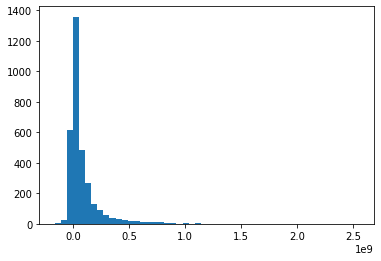

In [330]:
# profit(revenue-budget)のヒストグラム
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['profit'] = df['revenue'] - df['budget']

# 一つだけ表示するときはsubplots()に引数は指定しなくてOK。
# また、この場合axesはリストではないのでインデックスを付記しないように。
fig,axes = plt.subplots()
axes.hist(df['profit'], bins=50)



上記のように単にbins=50とすると、一部の突出した値（アバターのprofitなど）に引きずられ、  
他の映画はほとんどprofitがないように見えてしまう。これを防ぐために、横軸を対数表記(np.logspace)にする。

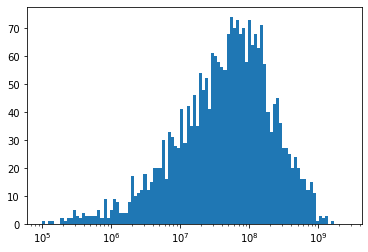

In [347]:
# logspace(始点、終点、要素数)。始点、終点には10の指数を指定する。
logbins = np.logspace(5, np.log10(df['profit'].max()), 100)

fig,axes = plt.subplots()
axes.hist(df['profit'], bins=logbins)

# 上記のままだとx軸はリニアのままなので、対数表記にする
axes.set_xscale('log')


# 棒グラフ：　plt.bar()
各分類の値に対して使う

In [348]:
df = pd.DataFrame({'categorical': ['A', 'B', 'C'], 'val': [10, 30, 20]})
df

,categorical,val
0,A,10
1,B,30
2,C,20


<BarContainer object of 3 artists>

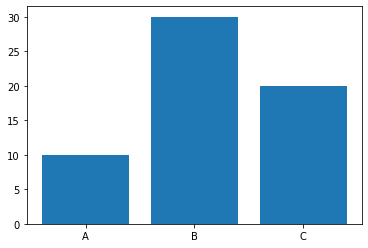

In [349]:
plt.bar('categorical','val',data=df)

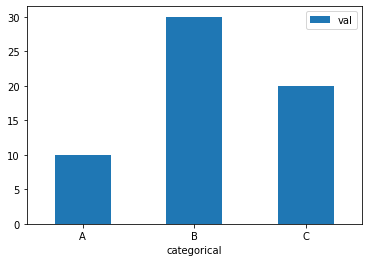

In [352]:
# DataFrameの組み込みのプロット関数でも描画できる
# rot=0は分類名の向きを変える
df.plot('categorical','val', kind='bar', rot=0)

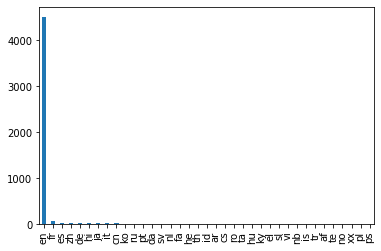

In [354]:
# Seriesに対してもプロットできる
df = pd.read_csv('../pandas/sample_data/tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

## 箱ひげ図(box plot)
25%ile,50%ile,75%ileの値を箱で表現し、箱の上下幅をひげのような線で表わした図。  
ひげよりも上あるいは下は外れ値となる。
* 第一四分位(Q1):25%ile
* 第二四分位(Q2):50%ile
* 第三四分位(Q3):75%ile
* IQR: Q3-Q1
* 上のひげの上限: Q3+1.5*IQR
* 下のひげの下限: Q1-1.5*IQR  
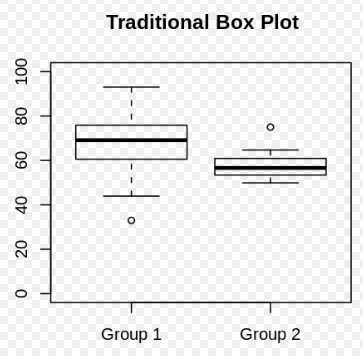  
参考：https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Simple-boxplot.svg/300px-Simple-boxplot.svg.png

{'whiskers': [<matplotlib.lines.Line2D at 0x7f186295a690>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18629519d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1862951990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1862960690>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f186295ac50>],
 'means': []}

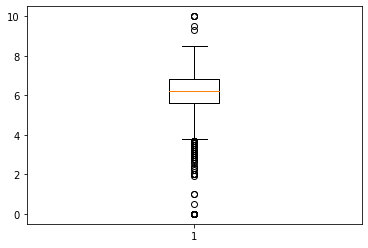

In [355]:
df = pd.read_csv('../pandas/sample_data/tmdb_5000_movies.csv')
plt.boxplot('vote_average', data=df)

## plotを保存する

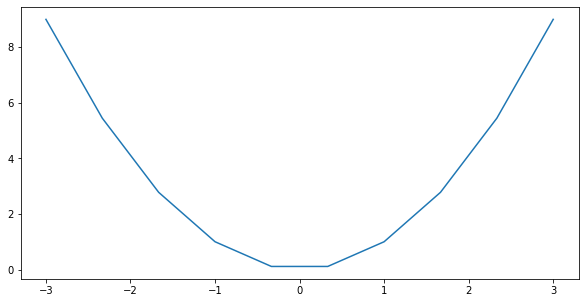

In [360]:
x = np.linspace(-3, 3, 10)
# 10インチ:5インチの比で描画する。
plt.figure(figsize=(10, 5))
plt.plot(x, x**2)

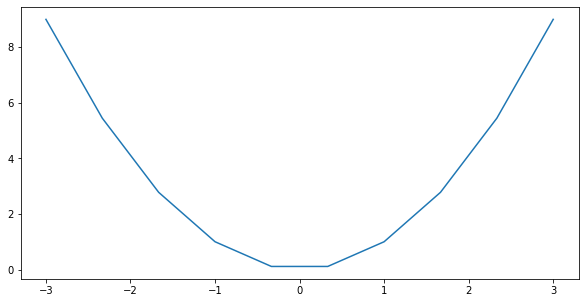

In [362]:
# オブジェクト指向でのやり方。
fig, axes = plt.subplots(figsize=(10,5))
axes.plot(x, x**2)

### pngファイルで保存：.savefig()

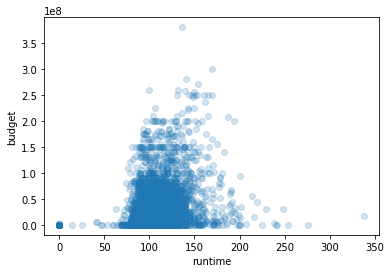

In [365]:
df = pd.read_csv('../pandas/sample_data/tmdb_5000_movies.csv')
plt.scatter('runtime','budget', data=df, alpha=0.2)
plt.xlabel('runtime')
plt.ylabel('budget')
plt.savefig('runtime_budget_scatter.png')

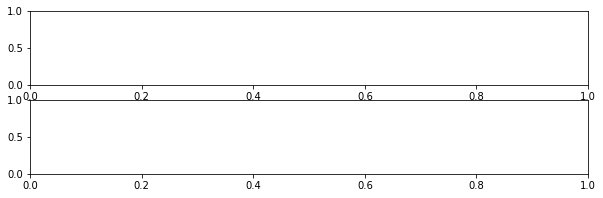

In [367]:
# subplotsの場合
fig, axes = plt.subplots(2, 1, figsize=(10,3))

axes[0].plot(x, )